In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import re
from matplotlib import rc
from scipy.stats import wilcoxon, mannwhitneyu, chisquare, ttest_ind, normaltest
%config Completer.use_jedi = False

In [2]:
neonatal_data = pd.read_csv('/Users/pgaldi/Documents/data/EdinburghBirthCohort-MRIDemographics_DATA_2022-04-07_1712.csv')

TEBC subjects

In [3]:
tebc_qc3_left = np.loadtxt('/Users/pgaldi/Documents/data/vb_neonatal/tebc_qc3_ids_left.txt')
tebc_qc3_right = np.loadtxt('/Users/pgaldi/Documents/data/vb_neonatal/tebc_qc3_ids_right.txt')

In [4]:
tebc_qc3_leftright = np.union1d(tebc_qc3_left,tebc_qc3_right)

In [5]:
subjects = neonatal_data.loc[neonatal_data['record_id'].isin(tebc_qc3_leftright),
                             ['record_id','gestation_calc', 'cga_mri_calc', 'preterm', 'birthweight_z_score',
                              'sex','birthweight_g','first_ofc_cm','mri_ofc','surgical_nec', 
                              'medical_nec', 'retinopathy_or_premat','bronchopulmonary_dysplasia']]
subjects_left = neonatal_data.loc[neonatal_data['record_id'].isin(tebc_qc3_left),
                             ['record_id','gestation_calc', 'cga_mri_calc',  'preterm', 'birthweight_z_score',
                              'sex','birthweight_g','first_ofc_cm','mri_ofc','surgical_nec', 
                              'medical_nec', 'retinopathy_or_premat','bronchopulmonary_dysplasia']]
subjects_right = neonatal_data.loc[neonatal_data['record_id'].isin(tebc_qc3_right),
                             ['record_id','gestation_calc', 'cga_mri_calc',  'preterm', 'birthweight_z_score',
                              'sex','birthweight_g','first_ofc_cm','mri_ofc','surgical_nec', 
                              'medical_nec', 'retinopathy_or_premat','bronchopulmonary_dysplasia']]

In [6]:
subjects['sex_binary'] = subjects['sex'] - 1
subjects_left['sex_binary'] = subjects_left['sex'] - 1
subjects_right['sex_binary'] = subjects_right['sex'] - 1

In [7]:
subjects['term'] = np.logical_not(subjects['preterm']).astype(int)
subjects_left['term'] = np.logical_not(subjects_left['preterm']).astype(int)
subjects_right['term'] = np.logical_not(subjects_right['preterm']).astype(int)

In [8]:
design_left = subjects_left.loc[:,['preterm','term','cga_mri_calc','sex_binary']]
design_right = subjects_right.loc[:,['preterm','term','cga_mri_calc','sex_binary']]

In [9]:
design_left.to_csv('design_tebc3_TvP_gas_sex_left.txt',header=None, index=False, sep='\t')
design_right.to_csv('design_tebc3_TvP_gas_sex_right.txt',header=None, index=False, sep='\t')

In [10]:
design_left.shape, design_right.shape

((160, 4), (187, 4))

In [11]:
preterm = subjects.loc[subjects['preterm']==1]
term = subjects.loc[subjects['preterm']==0]

In [12]:
preterm_left = subjects_left.loc[subjects['preterm']==1]
term_left = subjects_left.loc[subjects['preterm']==0]
preterm_right = subjects_right.loc[subjects['preterm']==1]
term_right = subjects_right.loc[subjects['preterm']==0]

In [13]:
preterm.shape, term.shape, subjects.shape

((147, 15), (72, 15), (219, 15))

In [14]:
preterm_left.shape, term_left.shape, subjects_left.shape

((103, 15), (57, 15), (160, 15))

In [15]:
preterm_right.shape, term_right.shape, subjects_right.shape

((132, 15), (55, 15), (187, 15))

In [16]:
preterm_sex_left = [sum(preterm_left['sex']==1),sum(preterm_left['sex']==2)]
preterm_sex_right = [sum(preterm_right['sex']==1),sum(preterm_right['sex']==2)]
term_sex_left = [sum(term_left['sex']==1),sum(term_left['sex']==2)]
term_sex_right = [sum(term_right['sex']==1),sum(term_right['sex']==2)]
preterm_sex_all = [sum(preterm['sex']==1),sum(preterm['sex']==2)]
term_sex_all = [sum(term['sex']==1),sum(term['sex']==2)]


print(chisquare(preterm_sex_left,preterm_sex_right), 
chisquare(term_sex_left,term_sex_right), 
chisquare(preterm_sex_left,preterm_sex_all), 
chisquare(term_sex_left,term_sex_all), 
chisquare(preterm_sex_right,preterm_sex_all), 
chisquare(term_sex_right,term_sex_all))

Power_divergenceResult(statistic=6.69757688723206, pvalue=0.009654402924044393) Power_divergenceResult(statistic=0.8206521739130435, pvalue=0.364989554508797) Power_divergenceResult(statistic=13.2280834914611, pvalue=0.0002757856540980379) Power_divergenceResult(statistic=3.167832167832168, pvalue=0.07510206919278943) Power_divergenceResult(statistic=1.6815939278937382, pvalue=0.1947127915723199) Power_divergenceResult(statistic=4.286713286713287, pvalue=0.03841135150297394)


In [17]:
var = 'cga_mri_calc'
score1 = preterm_left[var]
score2 = term_left[var]
score3 = preterm_right[var]
score4 = term_right[var]
score5 = preterm[var]
score6 = term[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=6388.5, pvalue=0.4285826773463628)
MannwhitneyuResult(statistic=1651.0, pvalue=0.6285802714633857)
MannwhitneyuResult(statistic=7197.0, pvalue=0.507086063114436)
MannwhitneyuResult(statistic=2071.5, pvalue=0.9281019056574578)
MannwhitneyuResult(statistic=9809.0, pvalue=0.8741437580803686)
MannwhitneyuResult(statistic=1896.0, pvalue=0.6841582347748946)


In [18]:
var = 'gestation_calc'
score1 = preterm_left[var]
score2 = term_left[var]
score3 = preterm_right[var]
score4 = term_right[var]
score5 = preterm[var]
score6 = term[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=6469.5, pvalue=0.5256012905319656)
MannwhitneyuResult(statistic=1595.0, pvalue=0.8748824172087353)
MannwhitneyuResult(statistic=7425.0, pvalue=0.7965437370283255)
MannwhitneyuResult(statistic=2071.5, pvalue=0.9280702312131277)
MannwhitneyuResult(statistic=9994.5, pvalue=0.6641431177972141)
MannwhitneyuResult(statistic=1964.5, pvalue=0.9417160263704167)


In [19]:
var = 'birthweight_g'
score1 = preterm_left[var]
score2 = preterm_right[var]

print('preterm:',score1.mean(),score1.std(),np.min(score1),np.max(score1))
print('term:',score2.mean(),score2.std(),np.min(score2),np.max(score2))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 1309.2815533980583 405.2103161848935 370 2510
term: 1327.1060606060605 416.444130533879 370 2510
NormaltestResult(statistic=0.4538887552470133, pvalue=0.7969651101507266)
NormaltestResult(statistic=1.5757129205550555, pvalue=0.4548186730288034)
Ttest_indResult(statistic=-0.33053939137583965, pvalue=0.7413041698542238)
MannwhitneyuResult(statistic=6655.0, pvalue=0.7828619483318671)


In [20]:
var = 'gestation_calc'
score1 = preterm[var]
score2 = term[var]
score3 = subjects[var]
print('preterm:',score1.mean(),score1.std(),np.min(score1),np.max(score1))
print('term:',score2.mean(),score2.std(),np.min(score2),np.max(score2))
print('all:',score3.mean(),score3.std(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 29.481981632653063 2.242823393978701 22.1428 32.8571
term: 39.47416944444444 1.1352420926447198 36.4285 42.0
all: 32.76708447488585 5.091479246474525 22.1428 42.0
NormaltestResult(statistic=13.370514686935419, pvalue=0.001249193240706569)
NormaltestResult(statistic=1.6101368118254034, pvalue=0.44705734414770315)
Ttest_indResult(statistic=-43.76855541129168, pvalue=1.419507995127472e-109)
MannwhitneyuResult(statistic=0.0, pvalue=2.961147640618969e-33)


In [21]:
var = 'cga_mri_calc'
score1 = preterm[var]
score2 = term[var]
score3 = subjects[var]
print('preterm:',score1.mean(),score1.std(),np.min(score1),np.max(score1))
print('term:',score2.mean(),score2.std(),np.min(score2),np.max(score2))
print('all:',score3.mean(),score3.std(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 40.70938503401361 1.487851579970617 36.5714 45.8571
term: 41.7876625 1.1156176217099292 38.2857 43.8571
all: 41.06388721461187 1.4648141242326211 36.5714 45.8571
NormaltestResult(statistic=14.689343580491752, pvalue=0.0006460253650004859)
NormaltestResult(statistic=0.8476397993354612, pvalue=0.6545417544815616)
Ttest_indResult(statistic=-5.995489086355733, pvalue=1.0707502263212816e-08)
MannwhitneyuResult(statistic=2705.5, pvalue=4.233751572199482e-09)


In [22]:
var = 'gestation_calc'
score1 = preterm[var]
score2 = term[var]
score3 = subjects[var]
print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))
print('all:',score3.mean(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 29.481981632653063 22.1428 32.8571
term: 39.47416944444444 36.4285 42.0
all: 32.76708447488585 22.1428 42.0
NormaltestResult(statistic=13.370514686935419, pvalue=0.001249193240706569)
NormaltestResult(statistic=1.6101368118254034, pvalue=0.44705734414770315)
Ttest_indResult(statistic=-43.76855541129168, pvalue=1.419507995127472e-109)
MannwhitneyuResult(statistic=0.0, pvalue=2.961147640618969e-33)


In [23]:
var = 'birthweight_g'
score1 = preterm[var]
score2 = term[var]
score3 = subjects[var]
print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))
print('all:',score3.mean(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 1317.9455782312925 370 2510
term: 3461.9444444444443 2410 4560
all: 2022.8219178082193 370 4560
NormaltestResult(statistic=1.7227075812484214, pvalue=0.4225895970582091)
NormaltestResult(statistic=0.7052074960346011, pvalue=0.7028556461482045)
Ttest_indResult(statistic=-32.26673229336294, pvalue=4.418768911581163e-62)
MannwhitneyuResult(statistic=1.0, pvalue=3.13501094193205e-33)


In [24]:
preterm_sex = [sum(preterm['sex']==1),sum(preterm['sex']==2)]
term_sex = [sum(term['sex']==1),sum(term['sex']==2)]
all_sex = [sum(subjects['sex']==1),sum(subjects['sex']==2)]
print(preterm_sex,term_sex,all_sex)
chisquare(preterm_sex,term_sex)

[85, 62] [39, 33] [124, 95]


Power_divergenceResult(statistic=79.74125874125875, pvalue=4.2679461703155435e-19)

In [25]:
sum(preterm['surgical_nec']==1), sum(preterm['medical_nec']==1), sum(preterm['retinopathy_or_premat']==1), sum(preterm['bronchopulmonary_dysplasia']==1) 

(2, 6, 6, 36)

dHCP demographics and design

0 is male 1 is female

In [26]:
dhcp_match = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/matched_sample_dHCP_20211207.csv',
                        header=None, names=['ID','session','age'])

In [27]:
dhcp_match['subject-session'] = dhcp_match['ID'] + '-' + dhcp_match['session'].astype(str)

In [28]:
dhcp_demo = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/dHCP_demographics.csv')

In [29]:
dhcp_demo['subject-session'] = dhcp_demo['participant_id'] + '-' + dhcp_demo['session_id'].astype(str)

In [30]:
dhcp_demo['sex_binary'] = (dhcp_demo['sex'] == 'female').astype(int)

In [31]:
dhcp_demo = dhcp_demo[dhcp_demo['subject-session'].isin(dhcp_match['subject-session'])]

In [32]:
dhcp_demo['preterm'] = (dhcp_demo['birth_age']<37).astype(int)
dhcp_demo['term'] = (dhcp_demo['birth_age']>=37).astype(int)

In [33]:
dhcp_qc4_ids_left = np.loadtxt('/Users/pgaldi/Documents/data/vb_neonatal/dhcp_qc4_ids_left.txt', dtype=str)
dhcp_qc4_ids_right = np.loadtxt('/Users/pgaldi/Documents/data/vb_neonatal/dhcp_qc4_ids_right.txt', dtype=str)

In [34]:
dhcp_qc4_ids_leftright = np.union1d(dhcp_qc4_ids_left, dhcp_qc4_ids_right)

In [37]:
dhcp_qc4_ids_left.shape, dhcp_qc4_ids_right.shape, dhcp_qc4_ids_leftright.shape

((104,), (109,), (127,))

In [38]:
dhcp_left = dhcp_demo.loc[dhcp_demo['subject-session'].isin(dhcp_qc4_ids_left),]
dhcp_right = dhcp_demo.loc[dhcp_demo['subject-session'].isin(dhcp_qc4_ids_right),]
dhcp_leftright = dhcp_demo.loc[dhcp_demo['subject-session'].isin(dhcp_qc4_ids_leftright),]

In [39]:
dhcp_preterm_left = dhcp_left.loc[dhcp_left['preterm']==1]
dhcp_term_left = dhcp_left.loc[dhcp_left['preterm']==0]
dhcp_preterm_right = dhcp_right.loc[dhcp_right['preterm']==1]
dhcp_term_right = dhcp_right.loc[dhcp_right['preterm']==0]

In [40]:
dhcp_preterm_leftright = dhcp_leftright.loc[dhcp_leftright['preterm']==1]
dhcp_term_leftright = dhcp_leftright.loc[dhcp_leftright['preterm']==0]

In [41]:
print(len(dhcp_preterm_left), len(dhcp_term_left), len(dhcp_preterm_right), len(dhcp_term_right))

37 67 39 70


In [42]:
print(len(dhcp_preterm_leftright), len(dhcp_term_leftright))

43 84


In [43]:
var = 'scan_age'
score1 = dhcp_preterm_left[var]
score2 = dhcp_term_left[var]
score3 = dhcp_preterm_right[var]
score4 = dhcp_term_right[var]
score5 = dhcp_preterm_leftright[var]
score6 = dhcp_term_leftright[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=752.5, pvalue=0.7509948170240703)
MannwhitneyuResult(statistic=2364.5, pvalue=0.9347491404677649)
MannwhitneyuResult(statistic=785.5, pvalue=0.9268847009381769)
MannwhitneyuResult(statistic=2672.5, pvalue=0.597210629875232)
MannwhitneyuResult(statistic=793.0, pvalue=0.6757498491976262)
MannwhitneyuResult(statistic=2764.0, pvalue=0.5239780122337654)


In [44]:
var = 'birth_age'
score1 = dhcp_preterm_left[var]
score2 = dhcp_term_left[var]
score3 = dhcp_preterm_right[var]
score4 = dhcp_term_right[var]
score5 = dhcp_preterm_leftright[var]
score6 = dhcp_term_leftright[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=686.0, pvalue=0.7156496409174213)
MannwhitneyuResult(statistic=2308.0, pvalue=0.8749300990930025)
MannwhitneyuResult(statistic=789.0, pvalue=0.9537685984104882)
MannwhitneyuResult(statistic=2644.0, pvalue=0.5249425840522044)
MannwhitneyuResult(statistic=873.0, pvalue=0.7518675130655222)
MannwhitneyuResult(statistic=2799.5, pvalue=0.6109513015807988)


In [45]:
tosave_left = dhcp_left.loc[:,['preterm','term','scan_age','sex_binary']]
tosave_right = dhcp_right.loc[:,['preterm','term','scan_age','sex_binary']]

In [46]:
tosave_left.to_csv('design_dhcp4_TvP_gas_sex_left.txt',header=None, index=False, sep='\t')
tosave_right.to_csv('design_dhcp4_TvP_gas_sex_right.txt',header=None, index=False, sep='\t')

In [47]:
dhcp_preterm = dhcp_leftright.loc[dhcp_demo['preterm']==1]
dhcp_term = dhcp_leftright.loc[dhcp_demo['preterm']==0]

In [48]:
dhcp_preterm.shape, dhcp_term.shape, dhcp_leftright.shape

((43, 52), (84, 52), (127, 52))

In [49]:
var = 'scan_age'
score1 = dhcp_preterm_leftright[var]
score2 = dhcp_term_leftright[var]
score3 = dhcp_leftright[var]
print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))
print('all:',score3.mean(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 40.857209302325586 38.14 44.29
term: 41.07416666666667 37.57 44.71
all: 41.00070866141733 37.57 44.71
NormaltestResult(statistic=2.9879661623304745, pvalue=0.22447676335009184)
NormaltestResult(statistic=30.211914970158475, pvalue=2.7514778460055947e-07)
Ttest_indResult(statistic=-0.6063701204423575, pvalue=0.5456512623871588)
MannwhitneyuResult(statistic=1698.0, pvalue=0.5837619689177139)


In [50]:
var = 'birth_age'
score1 = dhcp_preterm_leftright[var]
score2 = dhcp_term_leftright[var]
#score3 = dhcp_qc_demo[var]
print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))
#print('all:',score3.mean(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 28.983388703255816 23.0 32.71428571
term: 39.02721088440475 37.14285714 41.85714286
NormaltestResult(statistic=3.1296794198884985, pvalue=0.20912153058875374)
NormaltestResult(statistic=4.356600941105677, pvalue=0.11323381139764802)
Ttest_indResult(statistic=-22.7560709895701, pvalue=1.1743709570271705e-28)
MannwhitneyuResult(statistic=0.0, pvalue=3.5059102493480597e-20)


In [51]:
var = 'birth_weight'
score1 = dhcp_preterm_leftright[var]
score2 = dhcp_term_leftright[var]
score3 = dhcp_leftright[var]
print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))
print('all:',score3.mean(),np.min(score3),np.max(score3))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 1.1782558139534884 0.45 1.96
term: 3.184119047619048 2.06 4.3
all: 2.504968503937008 0.45 4.3
NormaltestResult(statistic=3.981535654834252, pvalue=0.1365905072347651)
NormaltestResult(statistic=2.210194217807507, pvalue=0.33117872027792694)
Ttest_indResult(statistic=-23.286899571310954, pvalue=1.0719689767638946e-43)
MannwhitneyuResult(statistic=0.0, pvalue=3.628077137562227e-20)


In [52]:
preterm_sex_binary = [sum(dhcp_preterm_leftright['sex_binary']==0),sum(dhcp_preterm_leftright['sex_binary']==1)]
term_sex_binary = [sum(dhcp_term_leftright['sex_binary']==0),sum(dhcp_term_leftright['sex_binary']==1)]
all_sex_binary = [sum(dhcp_leftright['sex_binary']==0),sum(dhcp_demo['sex_binary']==1)]
print(preterm_sex_binary,term_sex_binary,all_sex_binary)
chisquare(preterm_sex_binary,term_sex_binary)

[25, 18] [47, 37] [72, 69]


Power_divergenceResult(statistic=20.054629097182286, pvalue=7.526113459965083e-06)

In [53]:
var = 'birth_age'
score1 = dhcp_preterm_left[var]
score2 = dhcp_term_left[var]
score3 = dhcp_preterm_right[var]
score4 = dhcp_term_right[var]
score5 = dhcp_preterm[var]
score6 = dhcp_term[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=686.0, pvalue=0.7156496409174213)
MannwhitneyuResult(statistic=2308.0, pvalue=0.8749300990930025)
MannwhitneyuResult(statistic=789.0, pvalue=0.9537685984104882)
MannwhitneyuResult(statistic=2644.0, pvalue=0.5249425840522044)
MannwhitneyuResult(statistic=873.0, pvalue=0.7518675130655222)
MannwhitneyuResult(statistic=2799.5, pvalue=0.6109513015807988)


In [54]:
var = 'scan_age'
score1 = dhcp_preterm_left[var]
score2 = dhcp_term_left[var]
score3 = dhcp_preterm_right[var]
score4 = dhcp_term_right[var]
score5 = dhcp_preterm[var]
score6 = dhcp_term[var]

#print(stats.normaltest(score1))
#print(stats.normaltest(score3))
#print(stats.ttest_ind(score1, score3,equal_var=False))
print(mannwhitneyu(score1,score3,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score4))
#print(stats.ttest_ind(score2, score4,equal_var=False))
print(mannwhitneyu(score2, score4,alternative='two-sided'))

#print(stats.normaltest(score1))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score1, score5,equal_var=False))
print(mannwhitneyu(score1,score5,alternative='two-sided'))

#print(stats.normaltest(score2))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score2, score6,equal_var=False))
print(mannwhitneyu(score2,score6,alternative='two-sided'))

#print(stats.normaltest(score3))
#print(stats.normaltest(score5))
#print(stats.ttest_ind(score3, score5,equal_var=False))
print(mannwhitneyu(score3,score5,alternative='two-sided'))

#print(stats.normaltest(score4))
#print(stats.normaltest(score6))
#print(stats.ttest_ind(score4, score6,equal_var=False))
print(mannwhitneyu(score4,score6,alternative='two-sided'))

MannwhitneyuResult(statistic=752.5, pvalue=0.7509948170240703)
MannwhitneyuResult(statistic=2364.5, pvalue=0.9347491404677649)
MannwhitneyuResult(statistic=785.5, pvalue=0.9268847009381769)
MannwhitneyuResult(statistic=2672.5, pvalue=0.597210629875232)
MannwhitneyuResult(statistic=793.0, pvalue=0.6757498491976262)
MannwhitneyuResult(statistic=2764.0, pvalue=0.5239780122337654)


TEBC/dHCP comparison

In [55]:
subjects_left.shape, subjects_right.shape, dhcp_left.shape, dhcp_right.shape

((160, 15), (187, 15), (104, 52), (109, 52))

In [56]:
design_left_tebc = subjects_left.loc[:,['preterm','cga_mri_calc','sex_binary']]
design_right_tebc = subjects_right.loc[:,['preterm','cga_mri_calc','sex_binary']]
design_left_tebc.insert(0, 'dataset', 0)
design_left_tebc.insert(1, 'dataset_neg', 1)
design_right_tebc.insert(0, 'dataset', 0)
design_right_tebc.insert(1, 'dataset_neg', 1)
design_left_tebc.rename(columns={"cga_mri_calc": "scan_age"},inplace=True)
design_right_tebc.rename(columns={"cga_mri_calc": "scan_age"},inplace=True)

In [57]:
design_left_dhcp = dhcp_left.loc[:,['preterm','scan_age','sex_binary']]
design_right_dhcp = dhcp_right.loc[:,['preterm','scan_age','sex_binary']]
design_left_dhcp.insert(0, 'dataset', 1)
design_left_dhcp.insert(1, 'dataset_neg', 0)
design_right_dhcp.insert(0, 'dataset', 1)
design_right_dhcp.insert(1, 'dataset_neg', 0)

In [58]:
design_concat_left = pd.concat([design_left_tebc, design_left_dhcp])
design_concat_right = pd.concat([design_right_tebc, design_right_dhcp])

In [59]:
design_concat_left.to_csv('design_dHCPvTEBC2_preterm_gas_sex_left.txt',header=None, index=False, sep='\t')
design_concat_right.to_csv('design_dHCPvTEBC2_preterm_gas_sex_right.txt',header=None, index=False, sep='\t')

In [60]:
design_concat_left.shape, design_concat_right.shape

((264, 5), (296, 5))

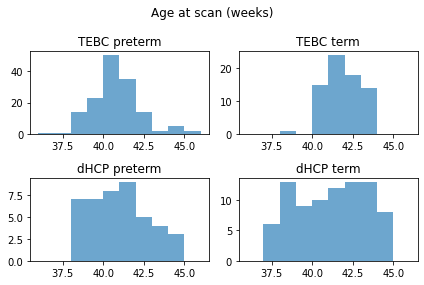

In [61]:
plt.subplot(221)
plt.hist(preterm['cga_mri_calc'], range=[36,46],alpha=0.65, bins=10)
plt.title('TEBC preterm')
plt.subplot(222)
plt.hist(term['cga_mri_calc'],range=[36,46],alpha=0.65, bins=10)
plt.title('TEBC term')
plt.subplot(223)
plt.hist(dhcp_preterm_leftright['scan_age'], range=[36,46],alpha=0.65, bins=10)
plt.title('dHCP preterm')
plt.subplot(224)
plt.hist(dhcp_term_leftright['scan_age'], range=[36,46],alpha=0.65, bins=10)
plt.title('dHCP term')
plt.suptitle('Age at scan (weeks)')
plt.tight_layout()
plt.savefig('hist_gas.png',dpi=300)

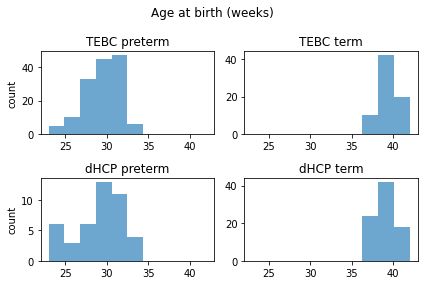

In [62]:
plt.subplot(221)
plt.hist(preterm['gestation_calc'], range=[23,42],alpha=0.65)
plt.title('TEBC preterm')
plt.ylabel('count')
plt.subplot(222)
plt.hist(term['gestation_calc'],range=[23,42],alpha=0.65)
plt.title('TEBC term')
plt.subplot(223)
plt.hist(dhcp_preterm_leftright['birth_age'], range=[23,42],alpha=0.65)
plt.title('dHCP preterm')
plt.ylabel('count')
plt.subplot(224)
plt.hist(dhcp_term_leftright['birth_age'], range=[23,42],alpha=0.65)
plt.title('dHCP term')
plt.suptitle('Age at birth (weeks)')
plt.tight_layout()
plt.savefig('hist_gab.png',dpi=300)

In [63]:
tebc_sex_binary = [sum(subjects['sex_binary']==0),sum(subjects['sex_binary']==1)]
dhcp_sex_binary = [sum(dhcp_demo['sex_binary']==0),sum(dhcp_demo['sex_binary']==1)]
print(tebc_sex_binary,dhcp_sex_binary)
chisquare(tebc_sex_binary,dhcp_sex_binary)

[124, 95] [92, 69]


Power_divergenceResult(statistic=20.92753623188406, pvalue=4.769884588868129e-06)

### QC

TEBC

In [89]:
p1 = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_paola_iteration1.csv')
p2 = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_paola_iteration2.csv')
p2_156 = p2.loc[p2['ID'].isin(p1['ID']),:]
kv = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_kadi.csv')
mb = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_manu.csv')

In [100]:
p1.set_index('ID', inplace=True)
p2.set_index('ID', inplace=True)
p2_156.set_index('ID', inplace=True)
kv.set_index('ID', inplace=True)
mb.set_index('ID', inplace=True)

In [104]:
iteration1 = np.array(p1).reshape(-1)
iteration2 = np.array(p2_156).reshape(-1)
paola = np.array(p2).reshape(-1)
manu = np.array(mb).reshape(-1)
kadi = np.array(kv).reshape(-1)

In [103]:
sum(np.logical_not(np.bitwise_xor(iteration1,iteration2)))/len(iteration1)

0.9448717948717948

In [105]:
sum(np.logical_not(np.bitwise_xor(paola,kadi)))/len(paola)

0.9398104265402843

In [106]:
sum(np.logical_not(np.bitwise_xor(paola,manu)))/len(paola)

0.9113744075829384

In [107]:
sum(np.logical_not(np.bitwise_xor(kadi,manu)))/len(paola)

0.933649289099526

dHCP

In [66]:
pg = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_pg.csv')
kv = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_kv.csv')
mb = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_mb.csv')

In [66]:
pg = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_pg.csv')
kv = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_kv.csv')
mb = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/QC/qc_dhcp_mb.csv')

In [67]:
pg.set_index('ID', inplace=True)
kv.set_index('ID', inplace=True)
mb.set_index('ID', inplace=True)

In [73]:
paola = np.array(pg[0:76]).reshape(-1)
manu = np.array(mb[0:76]).reshape(-1)
kadi = np.array(kv[0:76]).reshape(-1)

In [74]:
sum(np.logical_not(np.bitwise_xor(paola,kadi)))/len(paola)

0.95

In [75]:
sum(np.logical_not(np.bitwise_xor(paola,manu)))/len(paola)

0.9342105263157895

In [76]:
sum(np.logical_not(np.bitwise_xor(kadi,manu)))/len(paola)

0.9447368421052632

Motion and SNR

In [68]:
tebc_metrics = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/TEBC_structural_qc.csv')

In [69]:
rel_mot = pd.read_csv('/Users/pgaldi/Documents/data/vb_neonatal/qc_rel_mot.csv', header=None,names=['ID','rel_mot'])

In [70]:
rel_mot = rel_mot.loc[rel_mot['ID'].isin(tebc_qc3_leftright)]

In [71]:
dhcp_info = pd.read_table('/Users/pgaldi/Documents/data/vb_neonatal/dhcp_combined.tsv')

In [73]:
dhcp_info['subject-session'] = dhcp_info['participant_id'] + '-' + dhcp_info['session_id'].astype(str)

In [74]:
dhcp_metrics = dhcp_info.loc[dhcp_info['subject-session'].isin(dhcp_qc4_ids_leftright)]

In [75]:
dhcp_metrics['preterm'] = (dhcp_metrics['birth_age']<37).astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
dhcp_metrics.shape, dhcp_qc4_ids_leftright.shape

((127, 41), (127,))

In [80]:
dhcp_info.columns

Index(['participant_id', 'session_id', 'scan_number', 'singleton', 'sedation',
       'birth_age', 'scan_age', 'sex', 'birth_weight',
       'head_circumference_scan', 'qc_dmri_eddy_nvols', 'qc_dmri_shard_nvols',
       'radiology_score', 'radiology_low_image_quality',
       'qc_dmri_eddy_abs_motion', 'qc_dmri_eddy_rel_motion',
       'qc_dmri_eddy_snr_b0', 'qc_dmri_eddy_cnr_b0400',
       'qc_dmri_eddy_cnr_b1000', 'qc_dmri_eddy_cnr_b2500',
       'qc_dmri_eddy_percent_outlier_slices', 'qc_dmri_eddy_comment',
       'qc_dmri_shard_snr', 'qc_dmri_shard_translation',
       'qc_dmri_shard_rotation', 'qc_dmri_shard_outlier_ratio',
       'qc_dmri_shard_fail_visual_qc', 'qc_dmri_shard_comments',
       'qc_dmri_shard_comments_recon', 'qc_fmri_fieldmap_type',
       'qc_fmri_dvars_z', 'qc_fmri_tsnr_z', 'qc_fmri_mcdc2sbref_z',
       'qc_fmri_sbref2struct_z', 'qc_fmri_fmap2struct_z',
       'qc_fmri_standard2struct_z', 'qc_fmri_flagged', 'qc_fmri_comment',
       'qc_smri_pipeline_status'],

In [79]:
dhcp_info = dhcp_info.loc[dhcp_info['subject-session'].isin(dhcp_metrics['subject-session'])]

In [80]:
dhcp_info.index = range(len(dhcp_info))

In [ ]:
#dhcp_metrics['qc_dmri_eddy_abs_motion'] = dhcp_info['qc_dmri_eddy_abs_motion'] 
#dhcp_metrics['qc_dmri_eddy_rel_motion'] = dhcp_info['qc_dmri_eddy_rel_motion']  
dhcp_info['qc_dmri_eddy_snr_b0_effective'] = dhcp_info['qc_dmri_eddy_snr_b0'] * dhcp_metrics['FACTOR_qc_dmri_eddy_snr_b0']
dhcp_info['qc_dmri_eddy_cnr_b0400_effective'] = dhcp_info['qc_dmri_eddy_cnr_b0400'] *  dhcp_metrics['FACTOR_qc_dmri_eddy_cnr_b0400']
dhcp_info['qc_dmri_eddy_cnr_b1000_effective'] = dhcp_info['qc_dmri_eddy_cnr_b1000'] *  dhcp_metrics['FACTOR_qc_dmri_eddy_cnr_b1000']
dhcp_info['qc_dmri_eddy_cnr_b2500_effective'] = dhcp_info['qc_dmri_eddy_cnr_b1000'] *  dhcp_metrics['FACTOR_qc_dmri_eddy_cnr_b2500']

In [104]:
dhcp_metrics = dhcp_info.loc[dhcp_info['subject-session'].isin(dhcp_ID_leftright)]

In [54]:
toPlot = dhcp_metrics.loc[:,['qc_dmri_eddy_snr_b0_effective',
       'qc_dmri_eddy_cnr_b0400_effective', 'qc_dmri_eddy_cnr_b1000_effective',
       'qc_dmri_eddy_cnr_b2500_effective']].melt(var_name='groups', value_name='vals')

In [105]:
dhcp_metrics['qc_dmri_eddy_snr_b0_effective'].shape, tebc_metrics['qc_dmri_eddy_snr_b0_effective'].shape

((133,), (184,))

Text(0.5, 1.0, 'SNR')

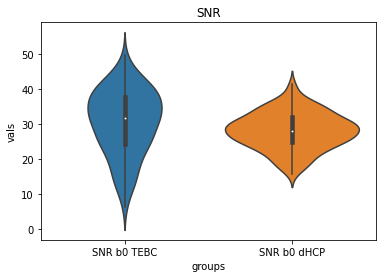

In [78]:
toPlot = pd.DataFrame({'SNR b0 TEBC':tebc_metrics['qc_dmri_eddy_snr_b0_effective'],
         'SNR b0 dHCP':dhcp_metrics['qc_dmri_eddy_snr_b0_effective']}).melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=toPlot)
ax.set_title('SNR')


Text(0.5, 0, '')

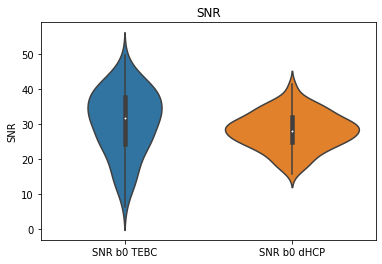

In [72]:
toPlot = pd.DataFrame({'SNR b0 TEBC':tebc_metrics['qc_dmri_eddy_snr_b0_effective'],
         'SNR b0 dHCP':dhcp_metrics['qc_dmri_eddy_snr_b0_effective']}).melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=toPlot)
ax.set_title('SNR')
ax.set_ylabel('SNR')
ax.set_xlabel('')

(-0.5, 7.0)

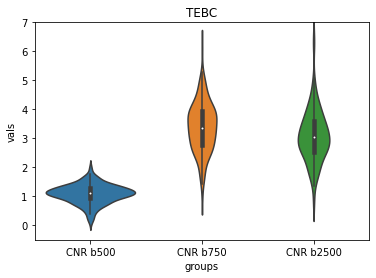

In [72]:
toPlot = tebc_metrics.loc[:,[
       'qc_dmri_eddy_cnr_b0500_effective', 'qc_dmri_eddy_cnr_b0750_effective',
       'qc_dmri_eddy_cnr_b2500_effective']].melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=toPlot)
ax.set_xticklabels(['CNR b500','CNR b750', 'CNR b2500'])
ax.set_title('TEBC')
ax.set_ylim([-0.5,7])

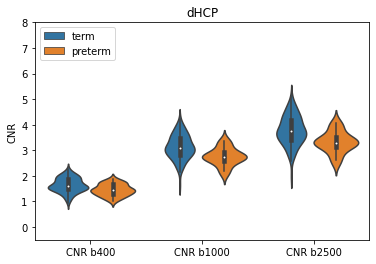

In [104]:
toPlot = dhcp_metrics.loc[:,[
       'qc_dmri_eddy_cnr_b0400_effective', 'qc_dmri_eddy_cnr_b1000_effective',
       'qc_dmri_eddy_cnr_b2500_effective']].melt(var_name='groups', value_name='vals')
toPlot['preterm'] =  np.tile(dhcp_metrics['preterm'],3)
toPlot = toPlot.assign(group=toPlot.preterm.map({0: "term", 1: "preterm"})) 
ax = sns.violinplot(x="groups", y="vals", hue='group', split=False,data=toPlot, hue_order=['term','preterm'])
ax.set_xticklabels(['CNR b400','CNR b1000', 'CNR b2500'])
ax.set_title('dHCP')
ax.set_ylim([-0.5,8])
ax.legend(loc="upper left")
ax.set_ylabel('CNR')
ax.set_xlabel('')
plt.savefig('cnr_dhcp.png',dpi=300)

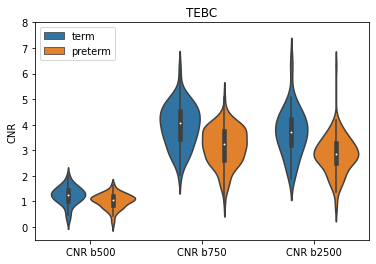

In [103]:
toPlot = tebc_metrics.loc[:,[
       'qc_dmri_eddy_cnr_b0500_effective', 'qc_dmri_eddy_cnr_b0750_effective',
       'qc_dmri_eddy_cnr_b2500_effective']].melt(var_name='groups', value_name='vals')
toPlot['preterm'] =  np.tile(tebc_metrics['preterm'],3)
toPlot = toPlot.assign(group=toPlot.preterm.map({0: "term", 1: "preterm"})) 
ax = sns.violinplot(x="groups", y="vals", hue='group', split=False,data=toPlot, hue_order=['term','preterm'])
ax.set_xticklabels(['CNR b500','CNR b750', 'CNR b2500'])
ax.set_title('TEBC')
ax.set_ylim([-0.5,8])
ax.legend(loc="upper left")
ax.set_ylabel('CNR')
ax.set_xlabel('')
plt.savefig('cnr_tebc.png',dpi=300)

In [95]:
tebc_metrics['preterm'] = subjects['preterm']

In [96]:
merged = pd.concat([dhcp_metrics.assign(dataset='dHCP'),tebc_metrics.assign(dataset='TEBC')])
merged.index = range(len(merged))

Text(0.5, 1.0, 'relative motion')

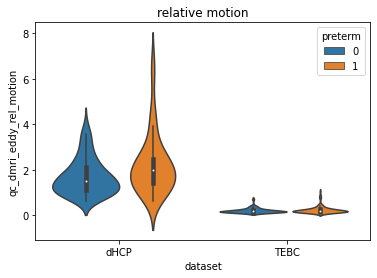

In [162]:
ax = sns.violinplot(y='qc_dmri_eddy_rel_motion',x='dataset',hue='preterm',data=merged)
ax.set_title('relative motion')

Text(0.5, 1.0, 'absolute motion')

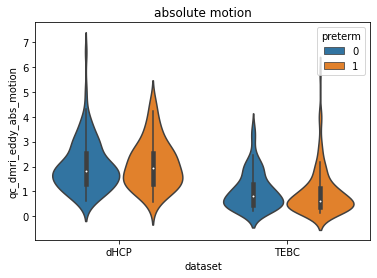

In [163]:
ax = sns.violinplot(y='qc_dmri_eddy_abs_motion',x='dataset',hue='preterm',data=merged)
ax.set_title('absolute motion')

Text(0.5, 1.0, 'absolute motion')

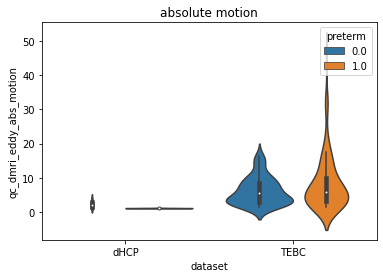

In [63]:
ax = sns.violinplot(y='qc_dmri_eddy_abs_motion',x='dataset',hue='preterm',data=merged)
ax.set_title('absolute motion')

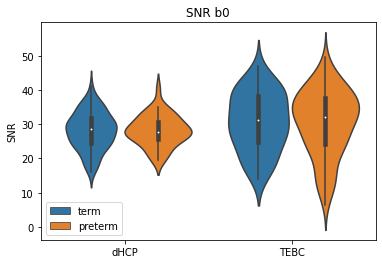

In [102]:
merged = merged.assign(group=merged.preterm.map({0: "term", 1: "preterm"})) 
ax = sns.violinplot(y='qc_dmri_eddy_snr_b0_effective',x='dataset',hue='group',data=merged)
ax.set_title('SNR b0')
ax.legend(loc="lower left")
ax.set_ylabel('SNR')
ax.set_xlabel('')
plt.savefig('snr.png',dpi=300)

Text(0.5, 1.0, 'str2diff')

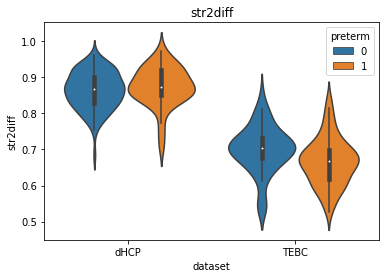

In [167]:
ax = sns.violinplot(y='str2diff',x='dataset',hue='preterm',data=merged)
ax.set_title('str2diff')

In [65]:
var = 'qc_dmri_eddy_rel_motion'
score1 = tebc_metrics.loc[tebc_metrics['preterm']==1,var]
score2 = tebc_metrics.loc[tebc_metrics['preterm']==0,var]

print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 0.2348148148148148 0.11 0.87
term: 0.21872340425531914 0.1 1.04
NormaltestResult(statistic=69.93686109919545, pvalue=6.507341091526144e-16)
NormaltestResult(statistic=75.4023122302144, pvalue=4.232489972230744e-17)
Ttest_indResult(statistic=0.6220413897838116, pvalue=0.5354518053379964)
MannwhitneyuResult(statistic=2101.5, pvalue=0.3279965415034395)


In [302]:
score1 = rel_mot.loc[subjects['preterm']==1,'rel_mot']
score2 = rel_mot.loc[subjects['preterm']==0,'rel_mot']

print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 0.23653061224489794 0.1 1.04
term: 0.2247222222222222 0.12 0.71
NormaltestResult(statistic=122.36321824135749, pvalue=2.68636341905497e-27)
NormaltestResult(statistic=45.457287527691065, pvalue=1.3460941356298781e-10)
Ttest_indResult(statistic=0.6547163068201766, pvalue=0.5135440222183048)
MannwhitneyuResult(statistic=5628.5, pvalue=0.4448797262640397)


In [310]:
var = 'qc_dmri_eddy_rel_motion'
score1 = dhcp_metrics.loc[dhcp_metrics['preterm']==1,var]
score2 = dhcp_metrics.loc[dhcp_metrics['preterm']==0,var]

print('preterm:',score1.mean(),np.min(score1),np.max(score1))
print('term:',score2.mean(),np.min(score2),np.max(score2))

print(stats.normaltest(score1))
print(stats.normaltest(score2))
print(stats.ttest_ind(score1, score2,equal_var=False))
print(mannwhitneyu(score1,score2,alternative='two-sided'))

preterm: 2.036744186046512 0.75 6.05
term: 1.715595238095238 0.65 3.64
NormaltestResult(statistic=22.141099041890655, pvalue=1.556400750024112e-05)
NormaltestResult(statistic=11.179253958787676, pvalue=0.003736421366932552)
Ttest_indResult(statistic=1.707003022792374, pvalue=0.0926925156328363)
MannwhitneyuResult(statistic=2105.5, pvalue=0.12767022549077184)
